In [70]:
# Import libraries
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
shots = pd.read_csv("/kaggle/input/nba-shot-logs/shot_logs.csv")

# Inspect the data
print(shots.head(5))
shots.info()

    GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            1   
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            2   
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            3   
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            4   
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            5   

   PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  PTS_TYPE  \
0       1       1:09        10.8         2  ...        7.7         2   
1       1       0:14         3.4         0  ...       28.2         3   
2       1       0:00         NaN         3  ...       10.1         2   
3       2      11:47        10.3         2  ...       17.2         2   
4       2      10:34        10.9         2  ...        3.7         2   

   SHOT_RESULT   CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  \
0     

In [71]:
# Display summary statistics
shots_description = shots.describe()
shots_description

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


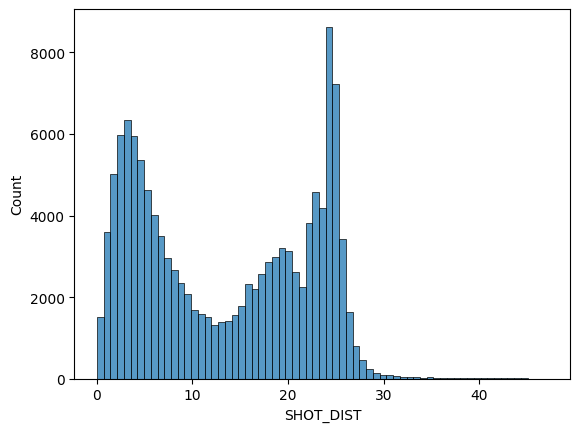

In [72]:
sns.histplot(data=shots, x="SHOT_DIST")
plt.show()

In [73]:
# Make column names lowercase for consistency
shots.columns = shots.columns.str.lower()

# Rename w column for clairty
shots.rename(columns={"w": "game_outcome"}, inplace=True)

In [74]:
# Create list of columns that should be categories
cat_list =  ["location", "game_outcome", "period", "pts_type", "shot_result"]

# Loop through dataframe columns to efficiently change data types
for col in shots.columns:
    if col in cat_list:
        shots[col] = shots[col].astype("category")

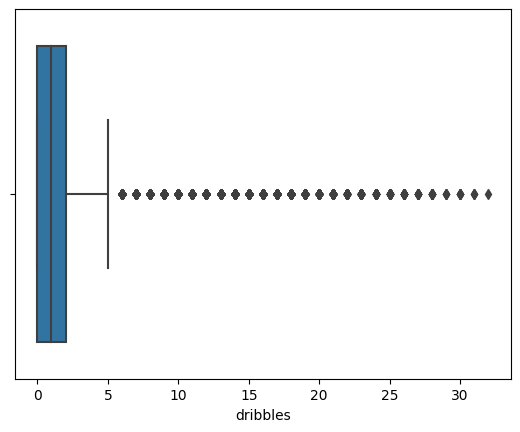

In [75]:
# Examine the number of dribbles before a shot
sns.boxplot(data=shots, x="dribbles")
plt.show()

In [76]:
# Calculate the average number of dribbles by shot result
shots.groupby("shot_result")["dribbles"].mean().round(2)

shot_result
made      1.89
missed    2.13
Name: dribbles, dtype: float64

In [77]:
# Count of shots made and missed
shots.value_counts("shot_result")

shot_result
missed    70164
made      57905
Name: count, dtype: int64

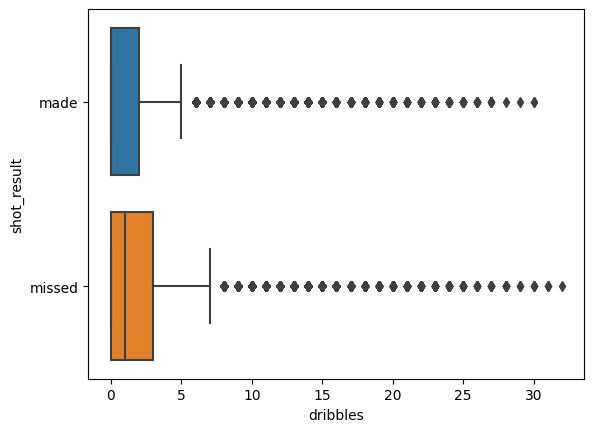

In [78]:
# Visualization of the mean difference in dribbles by shot result 
sns.boxplot(data=shots, x="dribbles",  y="shot_result")
plt.show()

In [79]:
# Get rows where game_clock is 0:00
expired_game_clock = shots.loc[shots['game_clock'] == "0:00", 'game_clock']
expired_game_clock

2         0:00
299       0:00
1744      0:00
1953      0:00
2118      0:00
          ... 
127730    0:00
127765    0:00
127905    0:00
127933    0:00
127965    0:00
Name: game_clock, Length: 480, dtype: object

In [80]:
# Filter out rows where game_clock is 0:00, shots aren't a part of the game
shots = shots[shots["game_clock"] != "0:00"]
assert [shots["game_clock"] != "0:00"]

In [81]:
# Check for missing data
shots.isna().sum()

game_id                          0
matchup                          0
location                         0
game_outcome                     0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5087
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

In [82]:
# Get uniques of shot clock for data validation
shot_clock_uniques = shots["shot_clock"].unique()
np.sort(shot_clock_uniques)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [83]:
# Verify missing values in the shot clock column
shot_clock_missing = shots["shot_clock"].isna()
df_shot_clock_missing = shots[shot_clock_missing]

# Check if shot clock missing values are due to game clock running out
# In basketball, the shot clock is affected by the game clock close to the end of a period
df_shot_clock_missing.groupby("game_clock")["shot_clock"].value_counts(dropna=False)

game_clock  shot_clock
0:01        NaN           849
0:02        NaN           525
0:03        NaN           385
0:04        NaN           273
0:05        NaN           190
                         ... 
9:55        NaN             4
9:56        NaN             4
9:57        NaN             1
9:58        NaN             5
9:59        NaN             3
Name: count, Length: 679, dtype: int64

In [84]:
# Set theshold for which columns should be dropped
threshold = len(shots) * 0.05
threshold

# Create variable for columns to drop
cols_to_drop = shots.columns[shots.isna().sum() < threshold]
cols_to_drop

Index(['game_id', 'matchup', 'location', 'game_outcome', 'final_margin',
       'shot_number', 'period', 'game_clock', 'shot_clock', 'dribbles',
       'touch_time', 'shot_dist', 'pts_type', 'shot_result',
       'closest_defender', 'closest_defender_player_id', 'close_def_dist',
       'fgm', 'pts', 'player_name', 'player_id'],
      dtype='object')

In [85]:
# Drop column values that are under the theshold
shots = shots.dropna(subset=cols_to_drop)

In [86]:
# Check missing values
shots.isna().sum()

game_id                       0
matchup                       0
location                      0
game_outcome                  0
final_margin                  0
shot_number                   0
period                        0
game_clock                    0
shot_clock                    0
dribbles                      0
touch_time                    0
shot_dist                     0
pts_type                      0
shot_result                   0
closest_defender              0
closest_defender_player_id    0
close_def_dist                0
fgm                           0
pts                           0
player_name                   0
player_id                     0
dtype: int64

In [87]:
# Drop rows where shot clock is 0.0. These shots aren't counted in the games
late_shot_clock = shots.loc[shots["shot_clock"] == 0.0]
shots.drop(late_shot_clock.index, inplace=True)

In [88]:
# Confirm that all shots occured with time on the clock
assert [shots["shot_clock"].min() > 0.0]

In [89]:
# Filter out rows where touch time is less than 0.3. 0.3 is the minimum time for a typical shot
shots = shots[shots["touch_time"] >= 0.3]
assert [shots["touch_time"].min() >= 0.3]

In [90]:
# Get uniques of shot distance for data validation
shots["shot_dist"].describe()
np.sort(shots["shot_dist"].unique())

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [91]:
# Examine the proportion of shots with a distance of 1 foot or less 
one_foot_shots = shots.loc[shots["shot_dist"] <= 1]["shot_dist"]

print(one_foot_shots.count() / len(shots))
print(one_foot_shots.mean())

0.019883876123196722
0.6837964942283027


In [92]:
# Set minimum shot distance to 1 foot
shots.loc[shots["shot_dist"] < 1, "shot_dist"] = 1
assert shots["shot_dist"].min() >= 1

In [93]:
# Print summary statistics
shots.describe()

,game_id,final_margin,shot_number,shot_clock,dribbles,touch_time,shot_dist,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,1.176330e+05,117633.000000,117633.000000,117633.000000,117633.000000,117633.000000,117633.000000,117633.000000,117633.000000,117633.000000,117633.00000,117633.000000
mean,2.140045e+07,0.258966,6.469069,12.250367,2.069802,2.862862,13.746695,159231.881606,4.164654,0.453623,1.00357,157153.418888
std,2.578418e+02,13.309090,4.682986,5.593983,3.455334,2.941481,8.695815,78589.622889,2.745893,0.497847,1.13533,79386.933223
min,2.140000e+07,-53.000000,1.000000,0.100000,0.000000,0.300000,1.000000,708.000000,0.000000,0.000000,0.00000,708.000000
25%,2.140023e+07,-8.000000,3.000000,8.100000,0.000000,0.900000,5.000000,200746.000000,2.300000,0.000000,0.00000,101162.000000
50%,2.140045e+07,1.000000,5.000000,12.100000,1.000000,1.700000,14.300000,201949.000000,3.700000,0.000000,0.00000,201936.000000
75%,2.140067e+07,9.000000,9.000000,16.300000,3.000000,3.800000,22.600000,203079.000000,5.300000,1.000000,2.00000,202704.000000
max,2.140091e+07,53.000000,37.000000,24.000000,32.000000,24.500000,43.300000,530027.000000,53.200000,1.000000,3.00000,204060.000000


In [94]:
# Set variables for types of 3 point shots
short_three = shots.loc[(shots["shot_dist"] == 22.0) & (shots["pts_type"] == 3)]
short_three_shot_result = short_three['shot_result'].value_counts(normalize=True)

long_three = shots.loc[shots["shot_dist"] == 23.9]
long_three_shot_result = long_three['shot_result'].value_counts(normalize=True)

print("Short three: ", short_three_shot_result, "\n")
print("Long three: ", long_three_shot_result)

Short three:  shot_result
missed    0.626087
made      0.373913
Name: proportion, dtype: float64 

Long three:  shot_result
missed    0.620859
made      0.379141
Name: proportion, dtype: float64


In [95]:
# Print shot results
avg_def_dist = shots["close_def_dist"].mean()
print("Average defender distance:", avg_def_dist, '\n')
print(shots.groupby('shot_result')["close_def_dist"].mean(), '\n')

print("Short three average defender distance:", short_three["close_def_dist"].mean(), '\n')
print(short_three.groupby("shot_result")["close_def_dist"].mean(), '\n')

print("Long three average defender distance:", long_three["close_def_dist"].mean(), "\n")
long_three.groupby("shot_result")["close_def_dist"].mean()

Average defender distance: 4.164654476209907 

shot_result
made      4.174337
missed    4.156616
Name: close_def_dist, dtype: float64 

Short three average defender distance: 6.602173913043479 

shot_result
made      7.015116
missed    6.355556
Name: close_def_dist, dtype: float64 

Long three average defender distance: 6.22441717791411 



shot_result
made      6.512298
missed    6.048617
Name: close_def_dist, dtype: float64

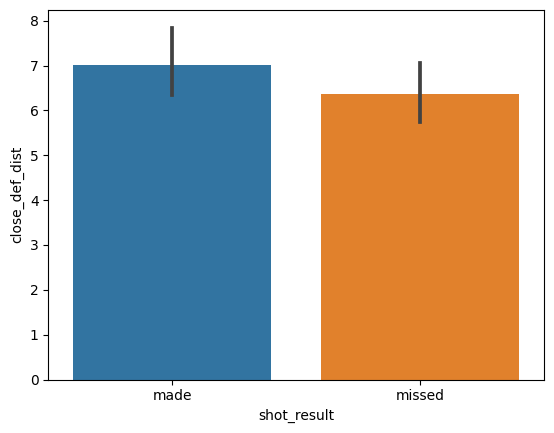

In [96]:
# Create barplot for short 3-pt shots
sns.barplot(data=short_three, x="shot_result", y="close_def_dist")
plt.show()

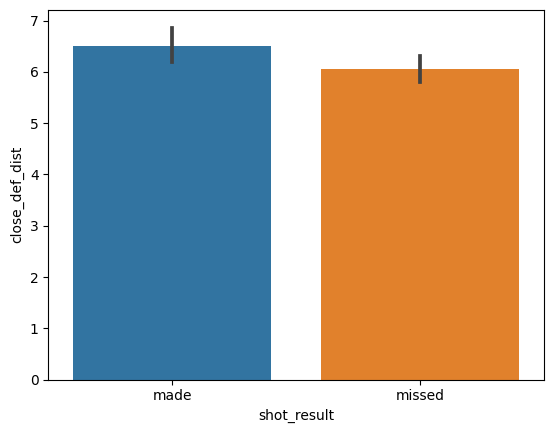

In [97]:
# Create barplot for long 3-pt shots
sns.barplot(data=long_three, x="shot_result", y="close_def_dist")
plt.show()

In [98]:
# Create variable for 3-pt shots
three_pointer = shots.loc[shots["pts_type"] == 3]

In [99]:
# Choose features for modeling
features = ["game_id", "game_outcome", "final_margin", "shot_number", 
            "dribbles", "touch_time", "shot_dist", "period", "shot_clock",
            "close_def_dist", "player_id", "closest_defender_player_id"]

# Split into feature and target sets
X = three_pointer[features]
y = three_pointer["fgm"]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Futher split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=123)

In [100]:
# Get dummies for training and test sets
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [101]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler and use it to scale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
# Fit the Logistic Regression to the training set
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [103]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set
y_pred = logreg.predict(X_test_scaled)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test_scaled, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.6456403704886617
[[3984   58]
 [2161   59]]
